**Trabalhando com Planilhas do Excel**

In [1]:
#Importando a biblioteca Pandas
import pandas as pd

In [4]:
#Realizando a leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
#Fazendo a junção de todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
#Pegando uma amostra de 5 linhas do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
232,Salvador,2019-01-03,167.76,1034,3
81,Recife,2019-01-01,36.52,982,8
39,Aracaju,2018-01-01,11.11,1522,8
93,Natal,2019-01-02,15.58,1037,1
25,Aracaju,2018-01-01,34.66,1521,8


In [8]:
#verificando o tipo de dados das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado da coluna lojaID
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
#Conferindo a alteração
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Fazendo o tratamento de dados faltantes**

In [14]:
#Consultando se existem linhas com dados faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#Substituindo os valores nullo por 0
df["Vendas"].fillna(0, inplace=True)

In [16]:
#Confirmando as alterações
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

**Criando novas colunas**

In [17]:
#Criando a coluna Receita
#Receita = Vendas * Qtde
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
#Verificando a criação da coluna e os dados populados
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [20]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [21]:
#Retorna as 3 linhas com as maiores Receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [22]:
#Retorna as 3 linhas com as menores Receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [24]:
#Agrupando por cidades
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
#Ordenando o conjundo de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com Datas**

In [29]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [31]:
#Conferindo as alterações
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [32]:
#Retornando a coluna de dadra para datetime
df["Data"] = pd.to_datetime(df["Data"])

In [33]:
#Conferindo as alterações
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [34]:
#Fazendo o agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [35]:
#Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [37]:
#conferindo a criação
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
27,Natal,2018-07-16,390.00,853,3,1170.00,2018
229,Salvador,2019-01-02,43.08,1036,2,86.16,2019
75,Fortaleza,2019-01-01,19.99,1005,4,79.96,2019
226,Salvador,2019-01-02,38.32,1035,2,76.64,2019
80,Recife,2019-01-01,114.14,982,8,913.12,2019


In [40]:
#Criando as colunas de mês e dia da venda
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [41]:
#conferindo a criação
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
89,Recife,2019-01-01,18.11,980,3,54.33,2019,1,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2
179,Salvador,2019-01-02,64.95,1036,1,64.95,2019,1,2
53,Recife,2019-01-01,37.05,983,6,222.30,2019,1,1
61,Fortaleza,2019-01-01,37.41,1002,5,187.05,2019,1,1


In [42]:
#Verificando a data de venda mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [43]:
#Verificando a data de venda mais recente
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [44]:
#Calculando a diferença de dias
df["Diferença_Dias"] = df["Data"] - df["Data"].min()

In [45]:
#conferindo a criação
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias
86,Aracaju,2018-01-01,154.92,1521,5,774.60,2018,1,1,0 days
81,Fortaleza,2019-01-01,10.68,1005,1,10.68,2019,1,1,365 days
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days
38,Recife,2019-01-01,104.53,983,4,418.12,2019,1,1,365 days
13,Salvador,2019-02-12,39.29,1035,1,39.29,2019,2,12,407 days


In [46]:
#Criando a coluna de trimestre
df["Trimenstre_Venda"] = df["Data"].dt.quarter

In [47]:
#conferindo a criação
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Trimenstre_Venda
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16,196 days,3
92,Natal,2019-01-02,4.57,1035,1,4.57,2019,1,2,366 days,1
1,Fortaleza,2019-01-01,115.61,1002,3,346.83,2019,1,1,365 days,1
41,Aracaju,2018-01-01,229.64,1520,8,1837.12,2018,1,1,0 days,1
15,Aracaju,2018-01-01,153.28,1523,6,919.68,2018,1,1,0 days,1


In [51]:
#Filtrando as vendas de 2019 do mês de Março
vendas_marco_2019 = df.loc[(df["Ano_Venda"] == 2019) & (df["Mes_Venda"] == 3)]

In [53]:
#conferindo a criação
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Trimenstre_Venda
141,Salvador,2019-03-02,9.08,1036,1,9.08,2019,3,2,425 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
133,Salvador,2019-03-02,153.71,1035,1,153.71,2019,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,2019,3,14,437 days,1


**Visualização de dados**

In [54]:
#Contando Quantas vendas cada loja fez
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

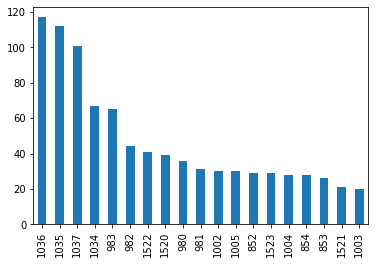

In [55]:
#Criando um gráfico de barras para mostras os dados obtidos anteriormente
#Trabalhando com a biblioteca maptplotlib
df["LojaID"].value_counts(ascending=False).plot.bar()

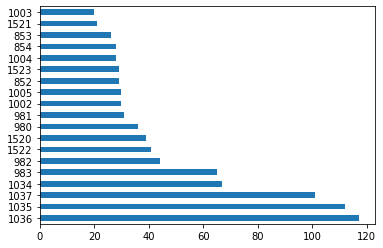

In [56]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

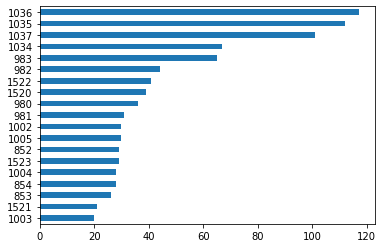

In [57]:
#Grafico de barras horizontais, retornando os dados ordenados pelas vendas
df["LojaID"].value_counts(ascending=True).plot.barh()

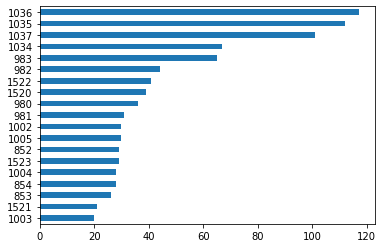

In [59]:
#Removendo a linha em cima do gráfico, basta acrescentar ; no final do comando
df["LojaID"].value_counts(ascending=True).plot.barh();

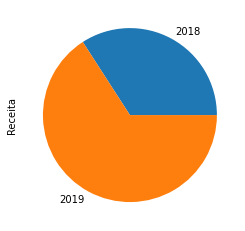

In [61]:
#Gráfico de Pizza
#Trazendo a Receita agrupada pelo ano
df.groupby(df["Ano_Venda"])["Receita"].sum().plot.pie();

In [63]:
#Total Vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

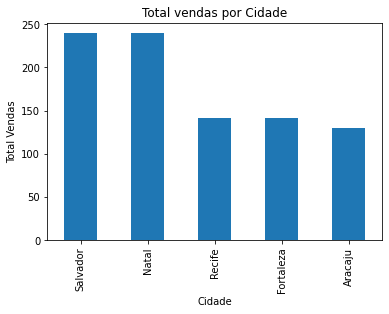

In [65]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

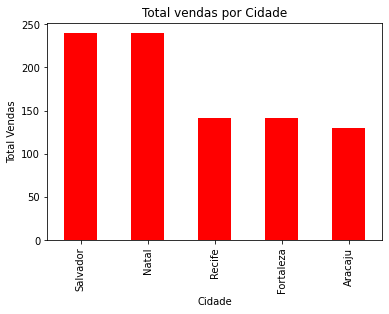

In [66]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [67]:
#alterando o estilo
plt.style.use("ggplot")

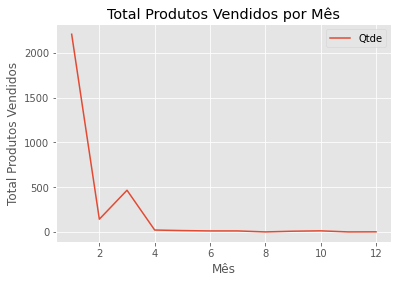

In [69]:
#Gráfico de linhas, passando apenas o .plot
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [71]:
#Agrupando o mês venda e somando a quantidade
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [72]:
#Pegando apenas os dados de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [73]:
#conferindo
df_2019.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Trimenstre_Venda
95,Fortaleza,2019-01-01,35.28,1002,2,70.56,2019,1,1,365 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1
44,Fortaleza,2019-01-01,215.11,1003,1,215.11,2019,1,1,365 days,1
30,Fortaleza,2019-01-01,39.13,1005,6,234.78,2019,1,1,365 days,1
33,Salvador,2019-01-01,144.19,1035,2,288.38,2019,1,1,365 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,2019,3,2,425 days,1
2,Salvador,2019-02-10,173.59,1035,3,520.77,2019,2,10,405 days,1
161,Salvador,2019-01-02,5.80,1036,1,5.80,2019,1,2,366 days,1
71,Salvador,2019-01-01,21.36,1035,2,42.72,2019,1,1,365 days,1
100,Salvador,2019-01-01,190.97,1036,2,381.94,2019,1,1,365 days,1


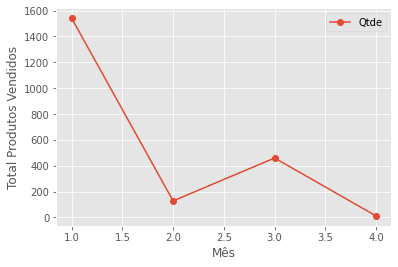

In [76]:
#Trazendo todas as vendas de por mês de 2019
#Incluindo o marcador
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

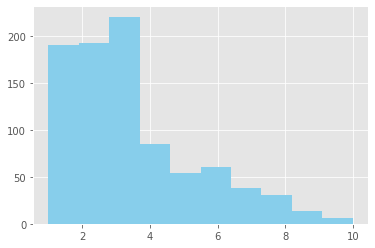

In [78]:
#Criando um histograma
plt.hist(df["Qtde"], color="skyblue");

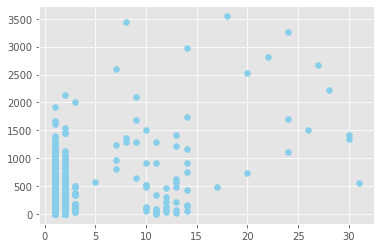

In [80]:
#Criando o gráfico de dispersão
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"], color="skyblue");

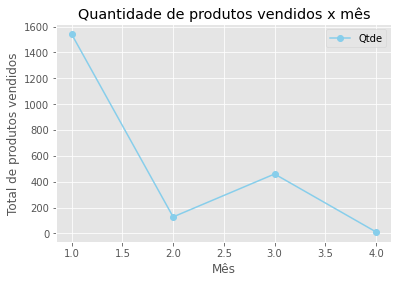

In [82]:
#Salvando os gráficos gerados em imagens
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o", color="skyblue")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();
plt.savefig("grafico QTDE x MES.png")